In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from DL import DLLayer, DLModel
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv('fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
emotions_names = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
data['emotion_name'] = data['emotion'].map(emotions_names)
data.head()

,emotion,pixels,Usage,emotion_name
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral


In [6]:
pixels_values = data.pixels.str.split(" ").tolist()
pixels_values = pd.DataFrame(pixels_values, dtype=np.int8)

In [7]:
images = pixels_values.values
images = images.astype(float)

In [8]:
print(images.shape)

(35887, 2304)


In [9]:
image_pixels = images.shape[1]
image_pixels

2304

In [10]:
labels_flat = data["emotion"].values.ravel()
labels_count = np.unique(labels_flat).shape[0]

In [11]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[[index_offset + labels_dense.ravel()]] = 1
    return labels_one_hot

In [12]:
labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)
print(labels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [13]:
m = 32298
X_train, Y_train = images[:m].T, labels[:m].T
X_test, Y_test = images[m:].T, labels[m:].T
print(X_train.shape, Y_train.shape)

(2304, 32298) (7, 32298)


In [29]:
model = DLModel()
model.add(DLLayer("Hidden 1", 64, (2304,), "relu", learning_rate=0.001))
model.add(DLLayer("Hidden 2", 128, (64,), "relu", learning_rate=0.001))
model.add(DLLayer("Hidden 3", 256, (128,), "relu", learning_rate=0.001))
model.add(DLLayer("Hidden 4", 1024, (256,), "relu", learning_rate=0.001))
model.add(DLLayer("Output", 7, (1024,), "softmax", learning_rate=0.001))

In [30]:
model.compile("categorical_cross_entropy")

In [31]:
costs = model.train(X_train, Y_train, 1500)

cost after  1 %: 1.94291376577244
cost after  2 %: 1.9409396784350483
cost after  3 %: 1.9388326023977596
cost after  4 %: 1.936525351780336
cost after  5 %: 1.9339403779508637
cost after  6 %: 1.9309810278255293
cost after  7 %: 1.9275347787147483
cost after  8 %: 1.9234662301978214
cost after  9 %: 1.9186201846062987
cost after  10 %: 1.9128227437026022
cost after  11 %: 1.9059074984052329
cost after  12 %: 1.8977694842344506
cost after  13 %: 1.8884788327446023
cost after  14 %: 1.878380841011135
cost after  15 %: 1.868150935565069
cost after  16 %: 1.858694765811335
cost after  17 %: 1.85074431001406
cost after  18 %: 1.8444941471937386
cost after  19 %: 1.839667550921556
cost after  20 %: 1.8358605151305372
cost after  21 %: 1.8327718748231852
cost after  22 %: 1.8302280912004663
cost after  23 %: 1.828130772565405
cost after  24 %: 1.8264115105848386
cost after  25 %: 1.825016109837966
cost after  26 %: 1.8238892397915496
cost after  27 %: 1.822983348488324
cost after  28 %: 1.82

In [23]:
model.save_weights('weights3')

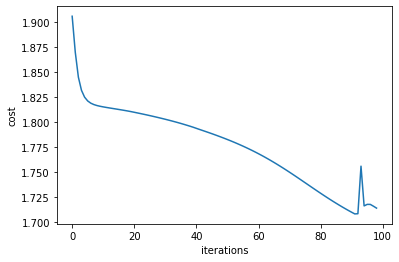

In [24]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

In [25]:
def predict_softmax(X, Y, model):
    AL = model.predict(X)
    predictions = np.argmax(AL, axis=0)
    labels = np.argmax(Y, axis=0)
    return confusion_matrix(predictions, labels)

In [26]:
print('Deep train accuracy')
pred_train = predict_softmax(X_train, Y_train, model)
print(pred_train)

Deep train accuracy
[[  45    2   20   22   30    3   19]
 [   0    0    0    0    0    0    0]
 [ 438   72  552  502  467  252  374]
 [1626  145 1281 5289 1606  587 1666]
 [ 707   45  645  609 1070  268  686]
 [ 879  125 1294  610 1048 1948 1041]
 [ 767  103  801 1078 1262  528 1786]]


In [27]:
print('Deep test accuracy')
pred_test = predict_softmax(X_test, Y_test, model)
print(pred_test)

Deep test accuracy
[[  5   1   1   5   1   0   2]
 [  0   0   0   0   0   0   0]
 [ 59  11  57  55  62  30  43]
 [164  20 127 575 179  67 176]
 [ 86   4  70  63 110  32  87]
 [ 95   7 169  80 118 219 105]
 [ 82  12 104 101 124  68 213]]


In [28]:
i = 4
print('train', str(i), str(pred_train[i][i] / np.sum(pred_train[:, i])))
print('test', str(i), str(pred_test[i][i] / np.sum(pred_test[:, i])))

train 4 0.19514864125478754
test 4 0.18518518518518517
